# 보험금 청구액 분석

## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### 2) 데이터 로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/insurance.csv'
data = pd.read_csv(path)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* 변수설명
    * **age**: age of primary beneficiary
    * **sex**: insurance contractor gender, female, male
    * **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
    * **children**: Number of children covered by health insurance / Number of dependents
    * **smoker**: Smoking
    * **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
    * **charges**: Individual medical costs billed by health insurance (target)


* 데이터의 크기를 살펴봅시다.

In [3]:
data.shape

(1338, 7)

## 2.개별 변수 분석하기

* 파악해야 할 부분
    * 변수의 의미
    * 분포
        * 대체로 데이터가 모여 있는 부분
        * 데이터가 희박한 부분
        * 특이한 부분
    * 비즈니스 파악하기
        * 분포로 부터 비즈니스 이해하기
    * 추가 분석하고 싶은 내용

### (1) 수치형 변수

* 그래프 : histogram, kdeplot, boxplot
* 기초통계량 : .describe()

In [12]:
def one_variable_plot(var):
    plt.figure(figsize = (15, 5))
    
    ax1 = plt.subplot(1,3,1)
    sns.histplot(x = var, data = data, ax=ax1)
    plt.grid()
        
    ax2 = plt.subplot(1,3,2)
    sns.kdeplot(x = var, data = data, ax = ax2)
    plt.grid()
    
    ax3 = plt.subplot(1,3,3)
    sns.boxplot(x = var, data = data, ax = ax3)
    plt.grid()
    
    plt.show()

#### 1) age

In [4]:
var = "age"

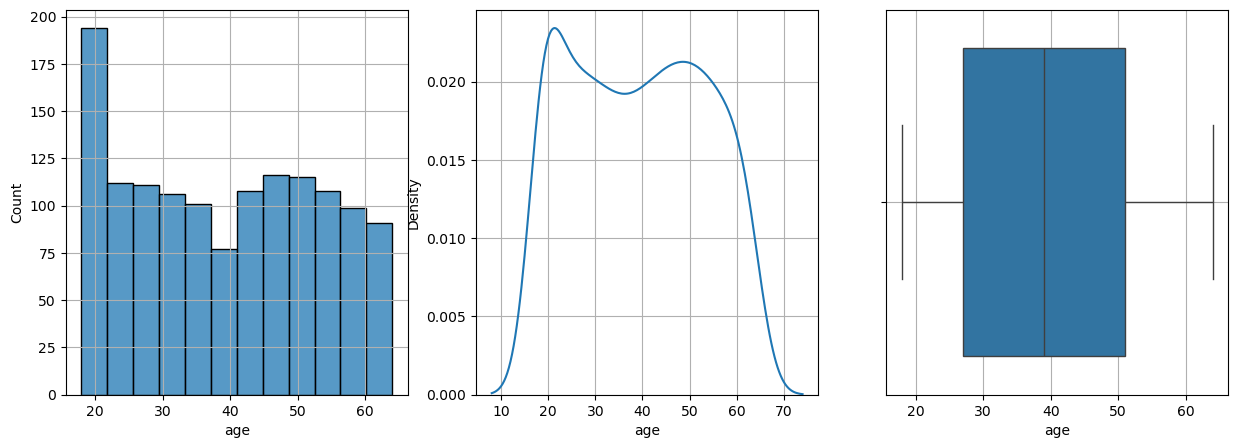

In [11]:
one_variable_plot(var)

In [ ]:
# multi-modal 같아 보인다.(20세, 50세를 평균으로 분포가 두 개 처럼 보임임)
# 18 ~ 28 정도에 밀집되어있다. (젊은 층이 많다?)

In [13]:
data[var].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

#### 2) bmi

In [14]:
var = 'bmi'

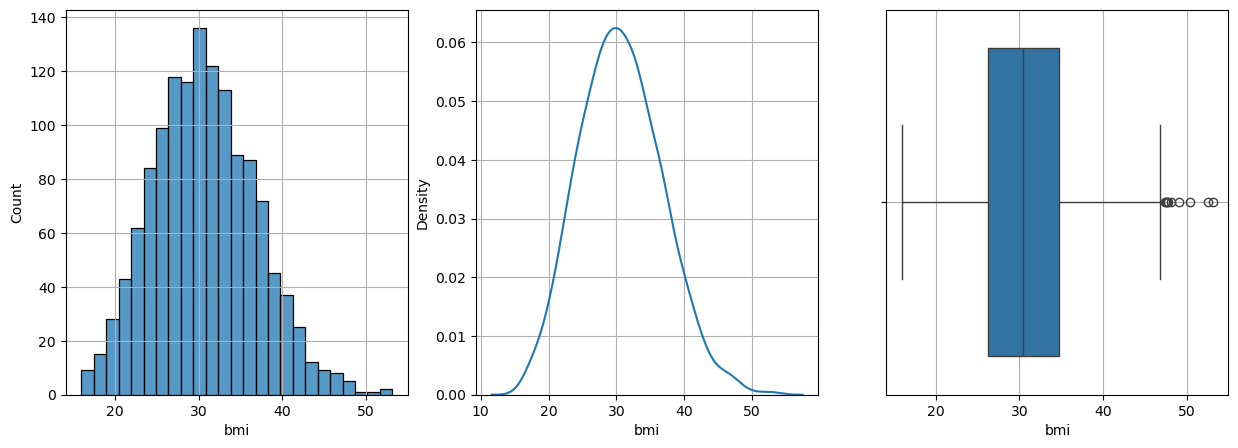

In [15]:
one_variable_plot(var)

In [ ]:
# 26~34 사이에 데이터가 밀집되어있다.
# 약 47정도 이상부터는 데이터가 희박하다. (비만으로 생각됨)
# bmi가 34 이상인 사람들이 26 이하인 사람들보다 분포가 더 희박하다. (bmi가 높을수록 보험에 가입을 잘 안시킨다?)

In [16]:
data[var].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

#### 4) charges (Target)

In [21]:
var = 'charges'

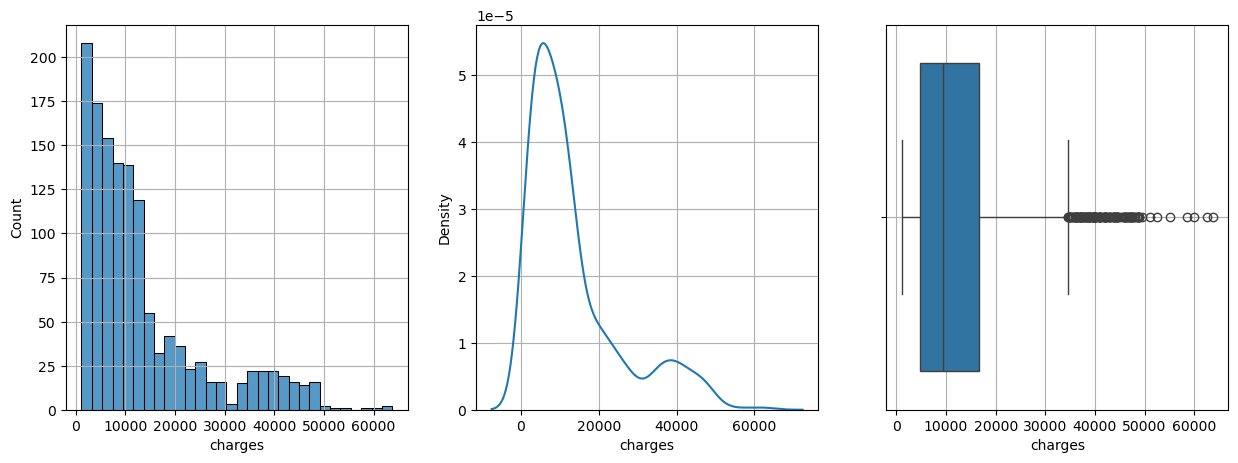

In [22]:
one_variable_plot(var)

In [23]:
data[var].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [24]:
# 보험금 청구액은 0 ~ 4740 사이에 밀집되어있고, 더 넓게 보면 0 ~ 16639 사이에 밀집되어있다. 반면 16639 이상으로 청구된 데이터들은 희박하다.
# 사람들이 상해를 입거나 질병에 걸리면 보험금 청구를 많이 할테지만,
# 대부분 사람들이 경미한 정도의 상해나 질병에 걸렸을 것이다.

### (2) 범주형 변수

* 그래프 : bar plot (sns.countplot)
* 기초통계량 : .value_counts()

#### 1) sex

In [25]:
var = 'sex'

<Axes: xlabel='sex', ylabel='count'>

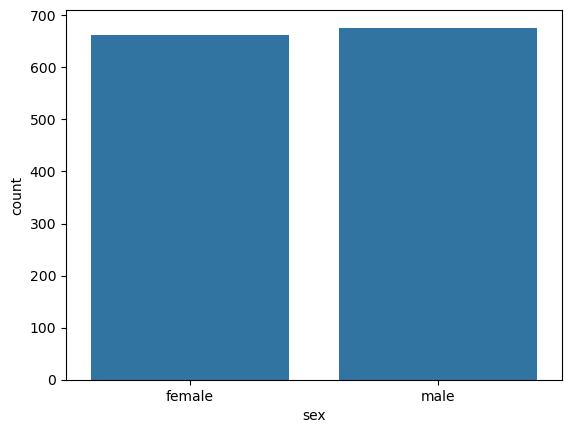

In [29]:
sns.countplot(x = var, data = data)

In [30]:
data[var].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [ ]:
# 데이터에 수집된 사람들의 성별은 반반이다.

#### 2) smoker

In [31]:
var = 'smoker'

<Axes: xlabel='smoker', ylabel='count'>

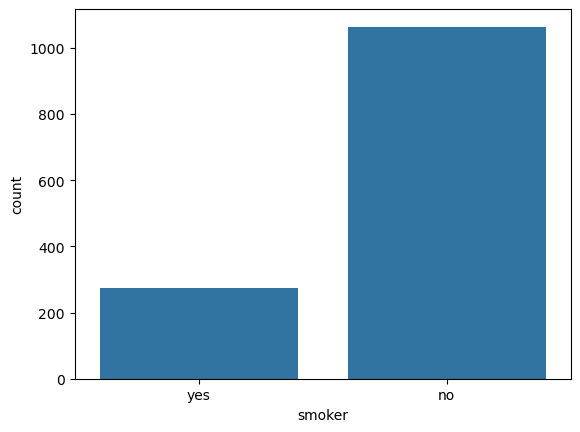

In [33]:
sns.countplot(x = var, data = data)

In [34]:
data[var].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [35]:
# 비흡연자의 수가 흡연자의 수의 약 5배이다.  
# 보험의 가입 조건이 흡연과 관련되어 있을 지도?

#### 3) region

In [36]:
var = 'region'

<Axes: xlabel='region', ylabel='count'>

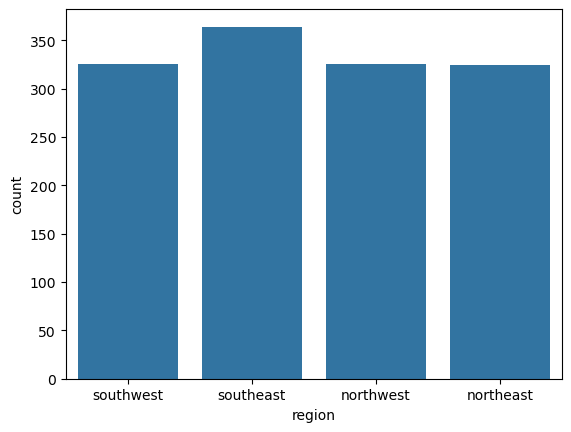

In [37]:
sns.countplot(x = var, data = data)

In [38]:
data[var].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [ ]:
# 데이터에 수집된 사람들의 거주 지역의 비율은 비슷하다.

### 4) children

In [39]:
var = 'children'

<Axes: xlabel='children', ylabel='count'>

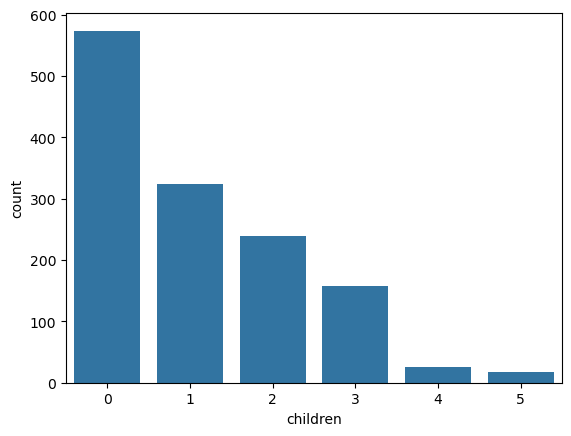

In [40]:
sns.countplot(x = var, data = data)

In [41]:
data[var].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [42]:
# 자녀가 없는 사람들이 가장 많다.
# 자녀가 4명 이상부터 숫자가 급감한다.
# 자녀의 수는 일반적으로 1명 ~ 3명인것 같다.

## 3.두 변수의 관계 분석하기

* 분석할 내용
    * x --> y 가설에 대한 증거 찾기
        * 그래프, 가설검정 도구
    * 관계 정리하기 : 강한, 중간, 약한 관계

In [43]:
target = 'charges'

### (1) 수치형 X --> 수치형 Y

* 그래프 : 산점도
* 가설검정 : 상관분석

In [44]:
def linearity(var, target):
    plt.figure(figsize = (10, 7))
    sns.scatterplot(x = var, y = target, data = data)
    plt.grid()
    
    plt.show()
    
    print(spst.pearsonr(data[var], data[target]))

#### 1) age --> charges

In [45]:
var = 'age'

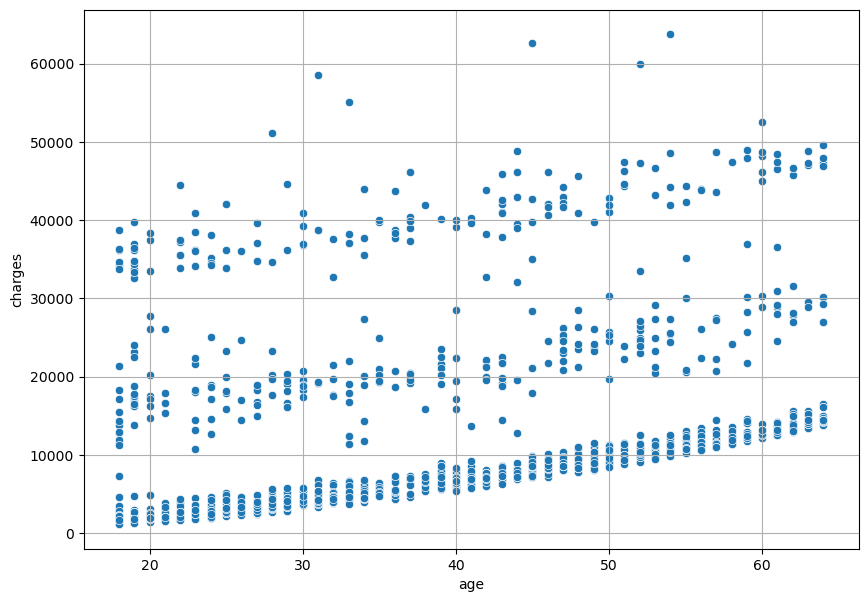

PearsonRResult(statistic=0.29900819333064765, pvalue=4.886693331718192e-29)


In [46]:
linearity(var, target)

In [ ]:
# 나이에 따라서 보험금 청구액이 늘어나는 약한 관계는 있어보인다.
# 그룹을 3개로 나누어서 볼 수도 있을 것 같다.(10000 이하, 10000 ~ 30000, 30000 이상)
# 왜 이렇게 나뉠까

#### 2) bmi --> charges

In [47]:
var = 'bmi'

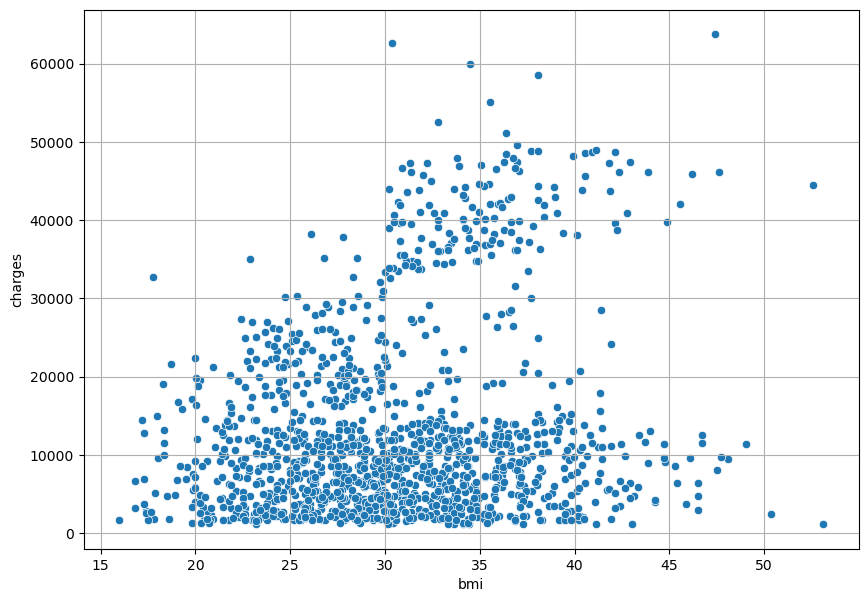

PearsonRResult(statistic=0.1983409688336289, pvalue=2.459085535116766e-13)


In [48]:
linearity(var, target)

In [ ]:
# bmi와 charges의 관계는 크게 없어보인다.
# 그룹도 나누어서 볼 수 있을 것 같다. (30 ~ 40 사이에는 특별히 보험금 청구액이 높은 사람들이 있다.)
# bmi가 25 ~ 30이면 경도비만, 30 이상이면 중정도, 35 이상이면 고도 비만이라고 한다.
# 비만과 관련된 질병에 걸린 사람들과 그렇지 않은 사람들이 있는걸까

### (2) 범주형 X --> 수치형 Y

* 그래프 : 평균비교 막대그래프 (sns.barplot)
* 가설검정 : 범주2 - t-test, 범주3개 이상 - 분산분석(anova)

In [90]:
def mean_testing(var, target):
    
    temp = data.copy()
    
    print(pd.factorize(temp[var])[1], " is factorized")
    temp[var] = pd.factorize(temp[var])[0]
    
    plt.figure(figsize = (10, 7))
    sns.barplot(x = var, y = target, data = data)
    plt.grid()
    
    plt.show()
    
    # check group nums
    t_test = True
    if temp[var].nunique() == 2:
        t_test = True
    else:
        t_test = False
        
    # if t-test is true then do t-test, else do anova
    if t_test:
        group1 = temp.loc[temp[var] == 0, target]
        group2 = temp.loc[temp[var] == 1, target]
        print(spst.ttest_ind(group1, group2))
    else:
        groups = []
        for i in range(temp[var].nunique()):
            group = temp.loc[temp[var] == i, target]
            groups.append(group)
            
        print(spst.f_oneway(*groups))
    
    

#### 1) sex --> charges

In [76]:
var = 'sex'

Index(['female', 'male'], dtype='object')  is factorized


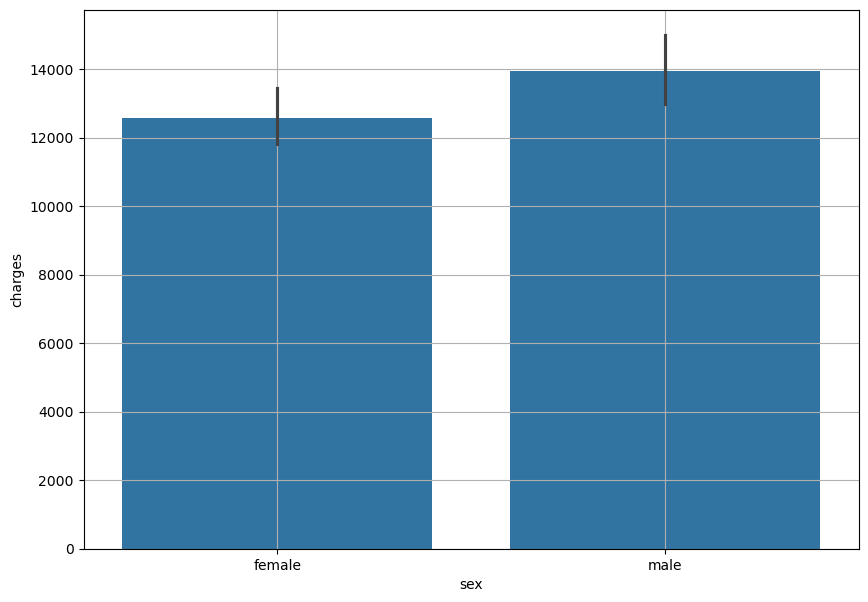

TtestResult(statistic=-2.097546590051688, pvalue=0.03613272100592976, df=1336.0)


In [77]:
mean_testing(var, target)

In [63]:
# 성별에 따른 평균 보험금 청구액은 큰 차이가 없어보인다.
# T-test 결과, 여성이 조금 덜 받는다고 할 수 있다.

#### 2) smoker --> charges

In [78]:
var = 'smoker'

Index(['yes', 'no'], dtype='object')  is factorized


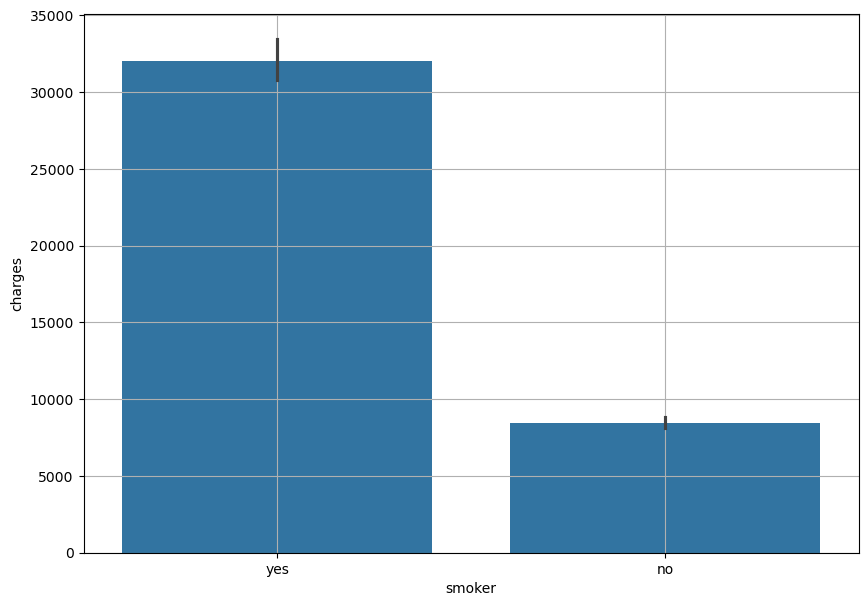

TtestResult(statistic=46.66492117272371, pvalue=8.271435842179102e-283, df=1336.0)


In [79]:
mean_testing(var, target)

In [ ]:
# 흡연 유무에 따른 평균 보험금 수령액에 큰 차이가 있어 보인다.
# 흡연자가 평균 보험금 수령액이 더 많다.

#### 3) region --> charges

In [88]:
var = 'region'

Index(['southwest', 'southeast', 'northwest', 'northeast'], dtype='object')  is factorized


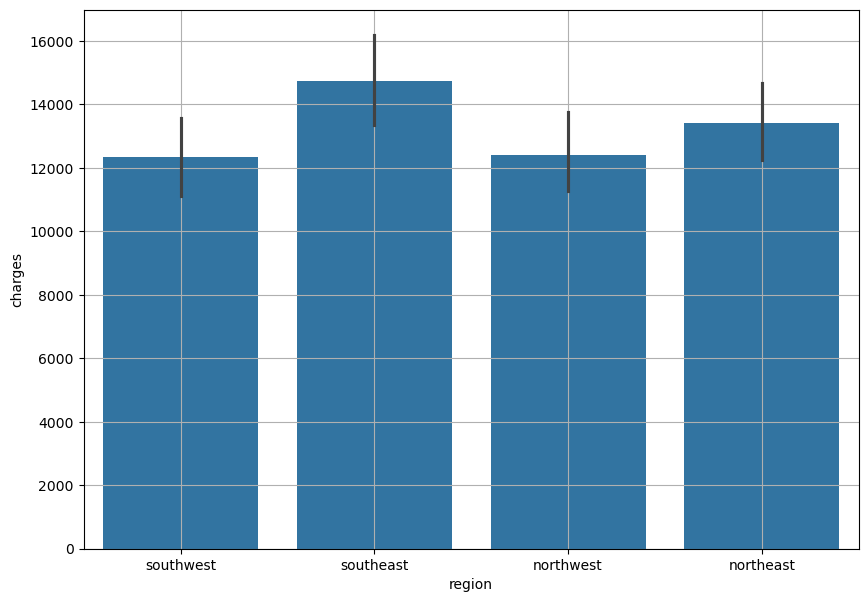

0
1
2
3
F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)


In [89]:
mean_testing(var, target)

In [ ]:
# 지역에 따른 평균 보험금 수령액에는 차이가 있다.

#### 4) children --> charges

In [82]:
var = 'children'

Index([0, 1, 3, 2, 5, 4], dtype='int64')  is factorized


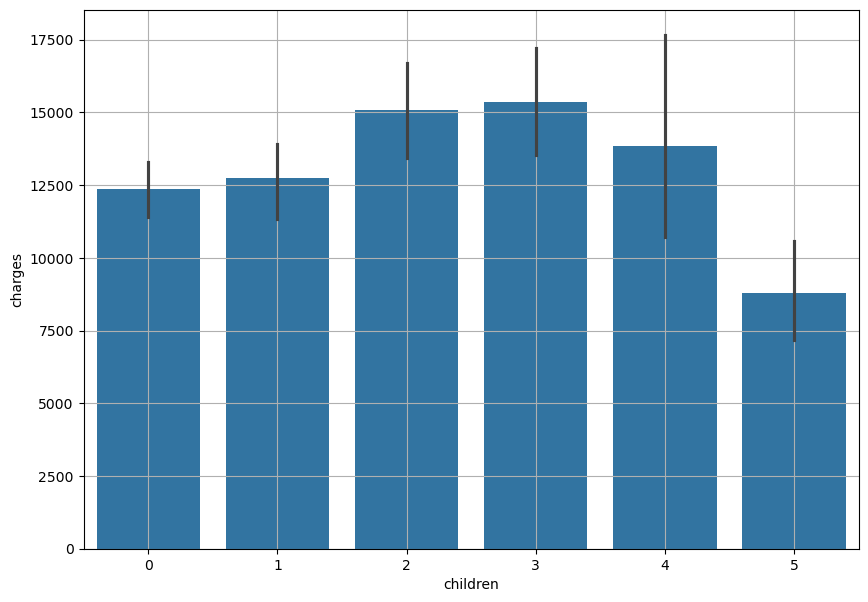

F_onewayResult(statistic=3.296920166720223, pvalue=0.00578568138087587)


In [83]:
mean_testing(var, target)

In [ ]:
# barplot 상에서는 평균 보험금 수령액에 차이가 있어보이지만
# anova 결과로는 평균 보험금 수령액에 차이가 없음.

### (3) 관계 정리하기

① 강한관계

In [ ]:
# smoker

② 중간관계

In [ ]:
# age, bmi

③ 관계없음 (또는 약한 관계)

In [ ]:
# sex, region, children